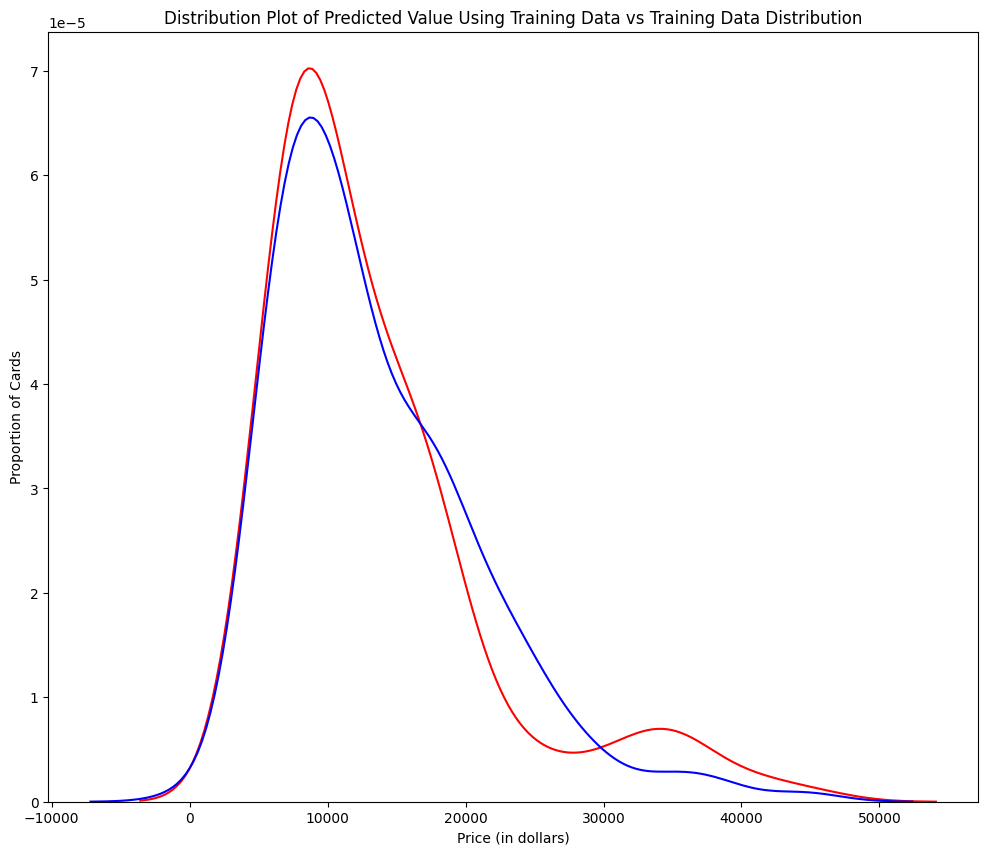

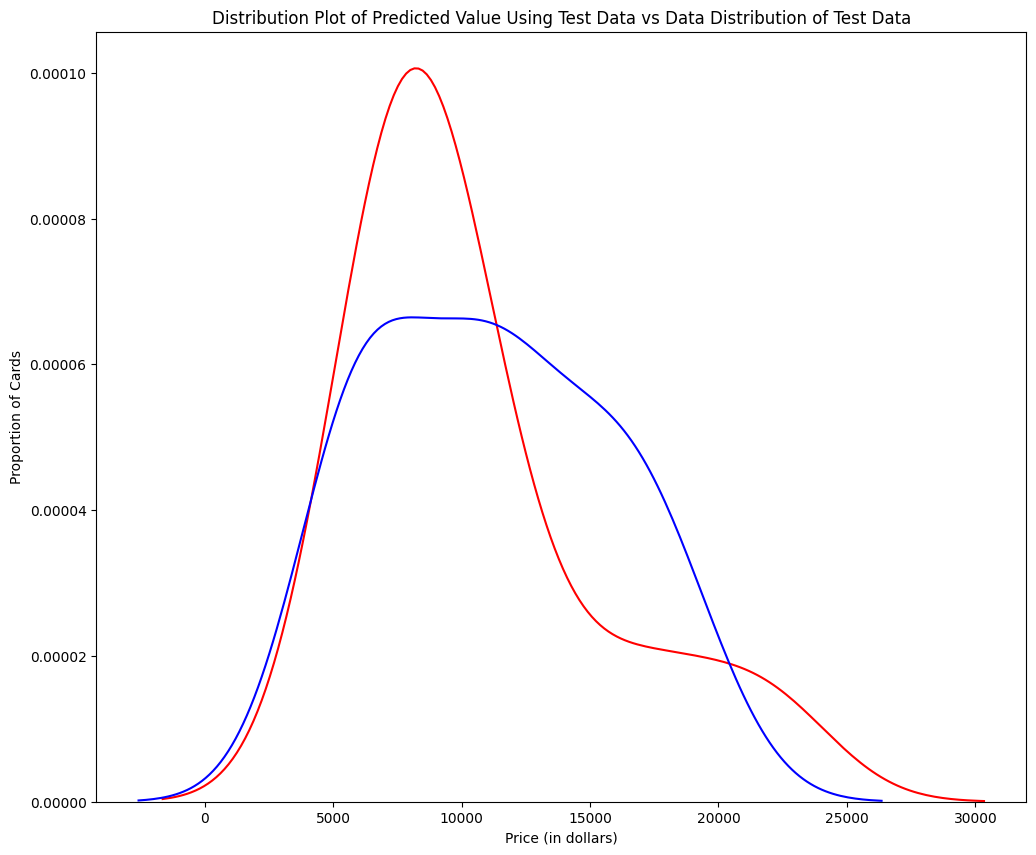

Predicted values:  [ 6441.63874384  7052.89782876 12145.78954272 18348.84324953]
True values:  [ 6295. 10698. 13860. 13499.]


Text(3, 0.75, 'Maximum R^2 ')

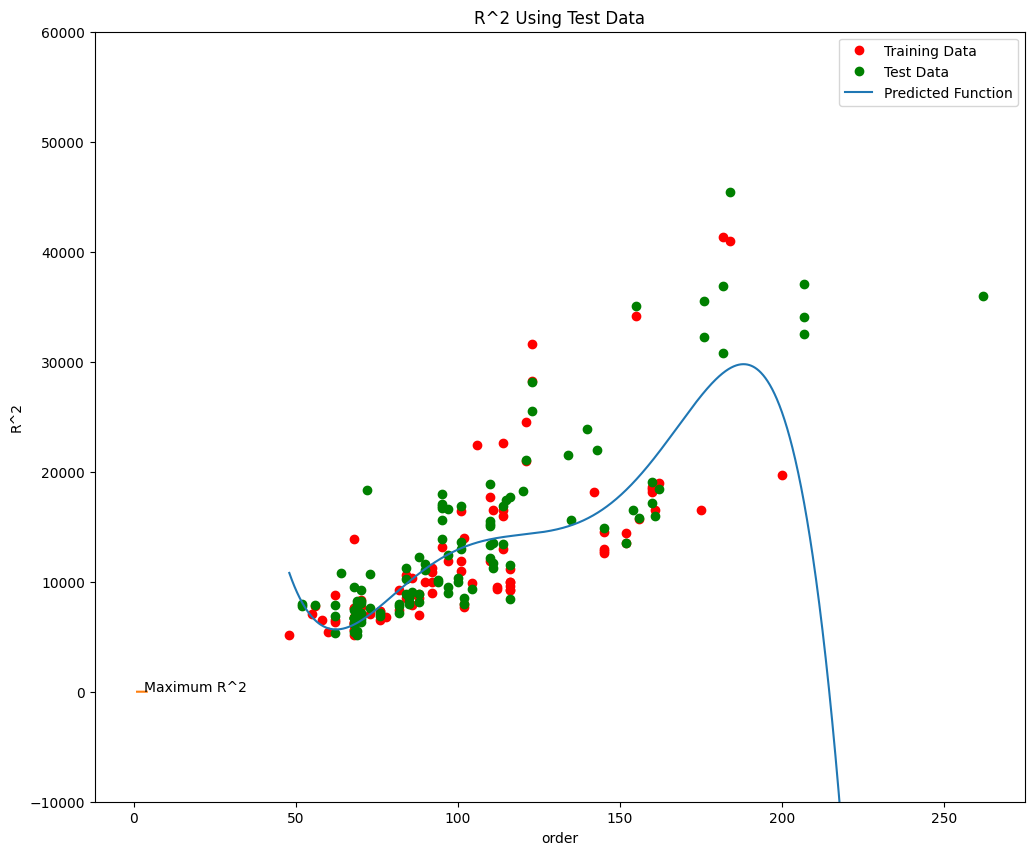

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

df = pd.read_csv(path)
df.to_csv('module_5_auto.csv')

df = df._get_numeric_data()
# print(df.head())

def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cards')
    plt.savefig('./Plots/DistPlot/' + Title)
    plt.show()
    plt.close()
    
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    #training data
    #testing data
    #lr: linear regression object
    #poly_transform: polynomial transformation object
    
    xmax = max([xtrain.values.max(), xtest.values.max()])
    
    xmin = min([xtrain.values.min(), xtest.values.min()])
    
    x = np.arange(xmin, xmax, 0.1)
    
    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()
    plt.savefig('./Plots/PollyPlot/' + Title)


#SECTION - Part 1: Training and Testing
# An important step in testing your model is to split your data into training and testing data. We will place the target data price in a separate dataframe y_data:

y_data = df['price']

x_data = df.drop('price', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

#STUB - Number of Test and Training Samples
# print('Number of test samples: ', x_test.shape[0])
# print('Number of training samples: ', x_train.shape[0])

# The test_size parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset.

#SECTION - Question #1): 
# Use the function 'train_test_split' to split up the dataset such that 4-% of the data samples will be utilized for testing. Set the parameter 'random_state' equal to zero. The output of the function should be the following: 'x_train1', 'x_test1', 'y_train1', and 'y_test1'.

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.40, random_state=0)
#STUB - Number of Test and Training Samples
# print('Number of test samples: ', x_test1.shape[0])
# print('Number of training samples: ', x_train1.shape[0])

#Create a Linear Regression object:
lre = LinearRegression()

# We fit the model using the feature 'horsepower':
lre.fit(x_train[['horsepower']], y_train)

# Let's calculate the R^2 on the test data:
lre.score(x_test[['horsepower']], y_test)

# We can see the R^2 is much smaller using the test data compared to the training data.
lre.score(x_train[['horsepower']], y_train)

#!SECTION

#SECTION - Question #2):
# Find the R^2 on the test data using 40% of the dataset for testing.
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.40, random_state=0)

lre.fit(x_train1[['horsepower']], y_train1)
lre.score(x_train1[['horsepower']], y_train1)

#!SECTION

# Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation.

#SECTION - Cross-Validation Score
# Let's import cross_val_score from the module model_selection.

# We input the object, the feature ('horsepower'), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4.
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv = 4)

# The default scoring is R^2. Each element in the array has the average R^2 value for the fold:
#STUB - Rcross
# print(Rcross)

# We can calculate the average and standard deviation of our estimate:
#STUB  - Average and Standard Deviation
# print("The mean of the folds are ", Rcross.mean(), " and the standard deviation is ", Rcross.std())

# We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.
-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv = 4, scoring = 'neg_mean_squared_error')

#SECTION - Question #3):
# Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the 'horsepower' feature:
Rc = cross_val_score(lre, x_data[['horsepower']], y_data, cv = 2)
Rc.mean()

# You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training.

# We input the object, the feature 'horsepower', and the target data y_data. The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:

yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv = 4)
yhat[0:5]

#!SECTION

#!SECTION

#!SECTION

#SECTION - Part 2: Overfitting, Underfitting and Model Selection
# It turns out that the test data, sometimes referred to as the 'out of sample data', is a much better measure of how well your model performs in the real world. One reason for this is overfitting.

# Let's g. over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in the context.

# Let's create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.

lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

# Prediction using training data:

yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

# Prediction using test data:

yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

# Let's perform some model evaluation using our training and testing data separately.

# Let's examine the distribution of the predicted values of the training data.

Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'

#STUB - Figure 1
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

# So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.

Title = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'

#STUB - Figure 2
DistributionPlot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

# Comparing Figure 1 & Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analyzing the test dataset.

#SECTION - Overfitting
# Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.

# Let's use 55 percent of the data for the training and the rest for testing:

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.55, random_state=0)

# We will perform a degree 5 polynomial transformation on the feature 'horsepower'ArithmeticError
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])

# Now, let's create a Linear Regression model 'poly' and train it.
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

# We can see the output of our model using the method 'predict'. We assign the values to 'yhat'.capitalize

yhat = poly.predict(x_test_pr)
yhat[0:5]

# Let's take the first five predicted values and compare it to the actual targets.

print("Predicted values: ", yhat[0:4])
print("True values: ", y_test[0:4].values)

# We will use the function 'PollyPlot' that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.
Title = 'PolyPlot displaying Training Data, Test Data, and Predicted Function'
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr, Title)

# We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

# R^2 of the training data:
poly.score(x_train_pr, y_train)

# R^2 of the test data:
poly.score(x_test_pr, y_test)

# We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower R^2, the worse the model. A negative R^2 is a sign of overfitting.

# Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:

Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))
    
Title = 'PolyPlot displaying Training Data, Test Data, and Predicted Function [V2]'
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')
plt.savefig('./Plots/PollyPlot/' + Title)

# We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.

def f(order, test_data, Title):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr, Title)
    
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

#SECTION - Question #4a):
# We can perform polynomial transformations with more than one feature. Create a 'PolynomialFeatures' object 'pr1' of degree two.



#!SECTION

#!SECTION

#!SECTION